# 📰 어린이 뉴스 EDA

## 1. import

In [86]:
import os
import numpy as np
import pandas as pd
#import spacy # 한국어 지원 안함
import re
import string
import math
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


sns.set(font="AppleGothic",
        rc={"axes.unicode_minus":False},
        style='whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 2. Load the dataset

In [87]:
df = pd.read_csv('./kid_news.csv', index_col=[0])

## 3. Look at the dataset

In [88]:
df.head()

,news_title,news_subtitle,news_article,news_url
0,"[세상 속으로] ""러시아 고양이는 안 됩니다""","국제고양이연맹, '월드 캣 쇼'서 퇴출",전 세계가 우크라이나를 침공(侵攻)한 러시아에 각종 제재를 가하고 있다. 이에 러시...,http://kid.chosun.com/site/data/html_dir/2022/...
1,[뉴스탐험대] 홀로 1000㎞… 우크라 國境<국경> 탈출한 11세 소년,NaN,우크라이나 소년이 홀로 국경(國境)을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언...,http://kid.chosun.com/site/data/html_dir/2022/...
2,[뉴스탐험대] 온라인 쇼핑몰 '니켈·납투성이 장신구' 주의,NaN,온라인 쇼핑몰에서 '무(無)알러지' '무니켈 도금' 등으로 홍보·판매되는 액세서리에...,http://kid.chosun.com/site/data/html_dir/2022/...
3,"[뉴스탐험대] ""코로나에 강한 혈액형 있다""… O형, 위험 최저",NaN,혈액형이 O형(型)인 람이 코로나 바이러스 감염 시 망·위중증 위험이 다른 혈액형보...,http://kid.chosun.com/site/data/html_dir/2022/...
4,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해,서울 면적 4분의 1 이상 불타,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림(山林) 피해가 우려되고 있...,http://kid.chosun.com/site/data/html_dir/2022/...


In [89]:
df.iloc[:, :3]

,news_title,news_subtitle,news_article
0,"[세상 속으로] ""러시아 고양이는 안 됩니다""","국제고양이연맹, '월드 캣 쇼'서 퇴출",전 세계가 우크라이나를 침공(侵攻)한 러시아에 각종 제재를 가하고 있다. 이에 러시...
1,[뉴스탐험대] 홀로 1000㎞… 우크라 國境<국경> 탈출한 11세 소년,NaN,우크라이나 소년이 홀로 국경(國境)을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언...
2,[뉴스탐험대] 온라인 쇼핑몰 '니켈·납투성이 장신구' 주의,NaN,온라인 쇼핑몰에서 '무(無)알러지' '무니켈 도금' 등으로 홍보·판매되는 액세서리에...
3,"[뉴스탐험대] ""코로나에 강한 혈액형 있다""… O형, 위험 최저",NaN,혈액형이 O형(型)인 람이 코로나 바이러스 감염 시 망·위중증 위험이 다른 혈액형보...
4,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해,서울 면적 4분의 1 이상 불타,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림(山林) 피해가 우려되고 있...
...,...,...,...
1670,돼지 뇌에 컴퓨터 칩 연결… 생각만으로 기계 움직일 수 있을까?,NaN,"머스크, 유튜브에 실험 돼지 '거트루드' 공개 ""뇌 질환 치료 도움… 올해 안에 람..."
1671,탑승형 로봇 '프로스테시스' 조종사를 뽑습니다!,NaN,"람의 팔다리에 연결해 조종 ""로봇 활용한 경주 스포츠 만들 것"" 람이 탑승한 로봇끼..."
1672,"모험 떠날 준비 됐니? 그럼, 책장을 펼쳐봐!",NaN,띵똥! 선물이 도착했습니다. 판타지 소설 '해리포터'의 작가 조앤 롤링(55·영국)...
1673,"방탄소년단·블랙핑크, 세계 음원시장 '올킬'",NaN,아이돌 그룹 방탄소년단(BTS)과 블랙핑크가 세계 무대를 뒤흔들고 있다. 글로벌 시...


In [7]:
print(list(df.columns))
print(df.shape)

['news_title', 'news_subtitle', 'news_article', 'news_url']
(1675, 4)


In [8]:
# 데이터 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1674
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_title     1675 non-null   object
 1   news_subtitle  403 non-null    object
 2   news_article   1636 non-null   object
 3   news_url       1675 non-null   object
dtypes: object(4)
memory usage: 65.4+ KB


---

## 4. 데이터 전처리(Data Preprocessing)

### 결측치 확인

In [9]:
# 결측값 확인
df.isnull().sum()

news_title          0
news_subtitle    1272
news_article       39
news_url            0
dtype: int64

In [10]:
df = df.fillna("")

In [11]:
# 결측값 확인
df.isna().sum()

news_title       0
news_subtitle    0
news_article     0
news_url         0
dtype: int64

---

### 문자열 길이 확인 및 추가

In [12]:
df['news_len'] = df['news_article'].apply(lambda x: len(x))

In [13]:
df.head()

,news_title,news_subtitle,news_article,news_url,news_len
0,"[세상 속으로] ""러시아 고양이는 안 됩니다""","국제고양이연맹, '월드 캣 쇼'서 퇴출",전 세계가 우크라이나를 침공(侵攻)한 러시아에 각종 제재를 가하고 있다. 이에 러시...,http://kid.chosun.com/site/data/html_dir/2022/...,469
1,[뉴스탐험대] 홀로 1000㎞… 우크라 國境<국경> 탈출한 11세 소년,,우크라이나 소년이 홀로 국경(國境)을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언...,http://kid.chosun.com/site/data/html_dir/2022/...,380
2,[뉴스탐험대] 온라인 쇼핑몰 '니켈·납투성이 장신구' 주의,,온라인 쇼핑몰에서 '무(無)알러지' '무니켈 도금' 등으로 홍보·판매되는 액세서리에...,http://kid.chosun.com/site/data/html_dir/2022/...,446
3,"[뉴스탐험대] ""코로나에 강한 혈액형 있다""… O형, 위험 최저",,혈액형이 O형(型)인 람이 코로나 바이러스 감염 시 망·위중증 위험이 다른 혈액형보...,http://kid.chosun.com/site/data/html_dir/2022/...,451
4,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해,서울 면적 4분의 1 이상 불타,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림(山林) 피해가 우려되고 있...,http://kid.chosun.com/site/data/html_dir/2022/...,620


In [14]:
# min 값을 봤을 때 기사가 없는 경우도 존재
df.describe().T

,count,mean,std,min,25%,50%,75%,max
news_len,1675.0,981.068657,724.715977,0.0,479.0,772.0,1221.0,9658.0


---

### 이상치 확인
- 이상한 뉴스 데이터 확인

In [15]:
# 기사 길이 200 이하 확인
condition = (df.news_len <= 200)

shorts_df = df[condition][['news_title','news_url','news_len']].sort_values(by='news_len' ,ascending=True)
shorts_df

,news_title,news_url,news_len
8,[메시지 뉴스] 명태·대게와 러시아,http://kid.chosun.com/site/data/html_dir/2022/...,0
303,[메시지 뉴스] 동지(冬至),http://kid.chosun.com/site/data/html_dir/2021/...,0
325,[메시지 뉴스] 성탄 트리의 기원,http://kid.chosun.com/site/data/html_dir/2021/...,0
389,[메시지 뉴스] 일본 한류 열풍,http://kid.chosun.com/site/data/html_dir/2021/...,0
400,[메시지 뉴스] 우주탐사 인형,http://kid.chosun.com/site/data/html_dir/2021/...,0
423,[메시지 뉴스] 대학수학 능력시험,http://kid.chosun.com/site/data/html_dir/2021/...,0
451,[메시지 뉴스] COP26,http://kid.chosun.com/site/data/html_dir/2021/...,0
485,[메시지 뉴스] 기초 학력과 학교생활,http://kid.chosun.com/site/data/html_dir/2021/...,0
504,[메시지 뉴스] 대통령 선거,http://kid.chosun.com/site/data/html_dir/2021/...,0
536,[메시지 뉴스] 탄소중립,http://kid.chosun.com/site/data/html_dir/2021/...,0


In [16]:
shorts_df.shape

(60, 3)

In [17]:
short_title = shorts_df.news_title
list(short_title)

['[메시지 뉴스] 명태·대게와 러시아',
 '[메시지 뉴스] 동지(冬至)',
 '[메시지 뉴스] 성탄 트리의 기원',
 '[메시지 뉴스] 일본 한류 열풍',
 '[메시지 뉴스] 우주탐사 인형',
 '[메시지 뉴스] 대학수학 능력시험',
 '[메시지 뉴스] COP26',
 '[메시지 뉴스] 기초 학력과 학교생활',
 '[메시지 뉴스] 대통령 선거',
 '[메시지 뉴스] 탄소중립',
 '[메시지 뉴스] 골프',
 '[메시지 뉴스] 국정감사',
 '[메시지 뉴스] 기네스북',
 '[메시지 뉴스] 추석',
 '[메시지 뉴스] 아프간 전쟁',
 '[메시지 뉴스] 코로나 백신',
 '[요리 쿡! 조리 쿡!] 시원하고 달콤하고 코코아 아이스바',
 '[요리 쿡! 조리 쿡!] 호호 불어 드세요 돌돌 말린 채소 춘권',
 '[요리 쿡! 조리 쿡!] 콕콕 찍어 입으로 쏙쏙 톡톡 튀는 팝콘 치킨',
 "[요리 쿡! 조리 쿡!] 파티 음식으로도 'OK' 토마토 브루스케타",
 '[메시지 뉴스] 세계의 새해 풍습',
 '[메시지 뉴스] 성년(成年) 기준',
 '기자들의 수다',
 '[영상-맛있는 실험실] 감자채 피자를 만들어 봤어요‼',
 '[메시지 뉴스] 체스',
 '[메시지 뉴스] 용감하게 질문하기!',
 '[메시지 뉴스] 어린이 교통안전',
 "[꿀beetv] 안철수 후보의 '어린이를 위한 대선공약'은?",
 '[꿀beetv] 어린이조선일보 기자들의 해보GO! "별걸 다 꾸며요"',
 '[메시지 뉴스] 한국판 미네르바 大學',
 '[꿀BEE] 강아지 건강에 최고인 수제 간식 만들기',
 '[신자영의 5분 영어] 모니 모니 석가모니 일화 속 영어 표현 배우기!',
 '[일상 속 간단한 운동] 본지 기자들, 스트레칭에 도전하다',
 '[메시지 뉴스] 올바른 양치법',
 '[메시지 뉴스] 어린이 안전 관리 강화',
 '[영상-출동! 명예기자] 국립과학수사연구원을 체험하다!',
 "[영상-출동! 명예기자] 화제의 인물 글 쓰는 의사 '남궁인'을 만나다!",
 '[메시지 뉴스] 재밌는

---

### 데이터 삭제
- 시리즈 기사 title과 그 외 text title 확인

In [18]:
# 전체 기사 대상 진행
split_title = []

for title in df.news_title:
    # m = re.search(r'(?<=\[).*(?=\])', title)
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        # sub_text = re.sub(r'[?]',"\?",title)
        split_title.append(title)

In [19]:
df['split_title'] = split_title

In [20]:
df[['split_title']][:10]

,split_title
0,[세상 속으로]
1,[뉴스탐험대]
2,[뉴스탐험대]
3,[뉴스탐험대]
4,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해
5,[뉴스탐험대]
6,"[우리의 보금자리, 놀라운 住居 상식]"
7,[주목! 정보 레터]
8,[메시지 뉴스]
9,[뉴스탐험대]


In [21]:
# 시리즈 기사 유니크 값 체크
count_unique_title = df.split_title.value_counts()
count_unique_title[count_unique_title >= 2]

[뉴스탐험대]                  544
[오늘의 키워드]                 86
기자들의 수다                   77
[메시지 뉴스]                  26
[팝콘뉴스]                    26
[주목! 정보 레터]               19
[푸른 별, 지구를 지켜라]           15
[ESG 기업 탐방]               14
[이슬기의 슬기로운 스토리 잡스]        10
[의학 정보 쏙쏙, 우리 아이 쑥쑥]       9
[여러분의 생각은?]                8
[기획]                       8
[사진으로 보는 세상]               7
[알차고 통통튀는 인터뷰]             7
[현장]                       5
[호국 보훈의 달 특집]              5
[기자 수첩]                    5
[출동! 명예기자]                 4
[탄소 중립 기획]                 4
[요리 쿡! 조리 쿡!]              4
[세상 속으로]                   4
[초등 트렌드]                   4
[꿀BeeTV]                   4
[알립니다]                     3
[영상-출동! 명예기자]              3
[현장 스케치]                   3
[우리의 보금자리, 놀라운 住居 상식]      3
[초등 줌터뷰]                   3
[꿀beetv]                   3
[생생~~영상뉴스]                 2
[현장 취재]                    2
간추린 소식                     2
[뉴스타그램]                    2
Name: split_title, dtype: int64

In [22]:
# 200줄 이하 기사 대상 진행
import re

split_title = []

for title in short_title:
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        split_title.append(title)

In [23]:
list(set(split_title))

['노릇하게 구워볼까? 폭신폭신 팬케이크',
 '돌돌 말렸네! 맛있는 시금치 롤',
 '[요리 쿡! 조리 쿡!]',
 "편하게 들고 '쏙쏙' 한입 토스트 꼬치",
 '잠자리 드론과 풍선 망원경? 과감한 박새의 사연은?',
 '기록, 또 기록… 케이팝에 한계란 없다',
 '초콜릿 잼 품은 바나나 크레이프',
 '[생생~~영상뉴스]',
 '[POPCORN NEWS]',
 '[일상 속 간단한 운동]',
 '[꿀beetv]',
 '[영상-출동! 명예기자]',
 '[정답 공개]',
 '기자들의 수다',
 '[꿀BeeTV]',
 '[카드뉴스]',
 '[신자영의 5분 영어]',
 '[생생 인터뷰 현장!]',
 '[꿀BEE]',
 '[영상-맛있는 실험실]',
 '[메시지 뉴스]',
 '신자영의 5분 영어!',
 '간편하게 한 끼 챙길 땐 쫀득쫀득 그래놀라 바',
 '[동영상]']

In [24]:
# 전체 기사에 대한 불용어 처리를 진행합니다
print('불용어 처리 전 df 크기:',len(df))

불용어 처리 전 df 크기: 1675


In [25]:
for title in split_title:
    # 불용어 단어가 news_title에 포함되지 않은 데이터를 걸러냅니다
    df = df[df['news_title'].apply(lambda x: title not in x)]
    # 간혹 시리즈 타이틀이 기사 본문 안에서 시작하는 경우도 있습니다
    df = df[df['news_article'].apply(lambda x: title not in x)]

In [26]:
print('불용어 처리 후 df 크기:',len(df))

불용어 처리 후 df 크기: 1538


In [27]:
# 기사의 길이가 300개 아래인 경우 버림
# 문장 요약을 위해 세 문장보다 많은 기사를 확보하기 위함
df = df[df['news_len'] > 300].reset_index(drop=True)
df.head(2)

,news_title,news_subtitle,news_article,news_url,news_len,split_title
0,"[세상 속으로] ""러시아 고양이는 안 됩니다""","국제고양이연맹, '월드 캣 쇼'서 퇴출",전 세계가 우크라이나를 침공(侵攻)한 러시아에 각종 제재를 가하고 있다. 이에 러시...,http://kid.chosun.com/site/data/html_dir/2022/...,469,[세상 속으로]
1,[뉴스탐험대] 홀로 1000㎞… 우크라 國境<국경> 탈출한 11세 소년,,우크라이나 소년이 홀로 국경(國境)을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언...,http://kid.chosun.com/site/data/html_dir/2022/...,380,[뉴스탐험대]


In [28]:
# 초기 데이터 : 1675
print('짧은 기사 처리 후 df 크기:',len(df))

짧은 기사 처리 후 df 크기: 1527


---

### 특수문자 및 공백 제거

In [29]:
import re 
def clean_text(text): 
    text = re.sub(r'(\[)(.*?)(\])','',str(text)) # remove [title]
    text = re.sub(r'(\()(.*?)(\))', '', text)  # 소괄호 (세부 설명
    text = re.sub(r'[?!]', '.', text)          # ?! => 마침표 처리
    text = re.sub(r'[\,\·\:\-\_]', ' ', text)  # 문장부호 구분자 => 공백 처리
    text = text.lower() #lower case 
    text = re.sub(r'\s+', ' ', text) #remove extra space
    # text = re.sub(r'<[^>]+>','',text) #remove Html tags 
    text = re.sub(r'<[^가-힣]+>','',text)# 홑화살괄호 => 한글만 빼고 제거
    text = re.sub(r'^\s+', '', text) #remove space from start
    text = re.sub(r'\s+$', '', text) #remove space from the end
    text = re.sub('[^가-힣\w. ]', '', text)    # 한글, 문자, 숫자, 마침표, 공백 제외 제거
    text = re.sub(r'[一-龥]', '', text) #remove Chinese character
    text = re.sub('\s{2,}', ' ', text)        # 2번 이상의 space 제거
    text = text.strip()
    return text

In [30]:
text = ' <p>[세상 속으로] <화마> "고양이? ssP 러시아·고양이(소말리·스핑크스·오리엔탈 등...)는 안  됩니다.無 1m 이상 유지하는 사회적 거리두기를 시행</p>" '
clean_text(text)

'화마 고양이. ssp 러시아 고양이는 안 됩니다. 1m 이상 유지하는 사회적 거리두기를 시행'

In [31]:
df["news_title"] = df["news_title"].apply(clean_text)
df["news_subtitle"] = df["news_subtitle"].apply(clean_text)
df["news_article"] = df["news_article"].apply(clean_text)

In [32]:
df.head()
# df.iloc[:, ]

,news_title,news_subtitle,news_article,news_url,news_len,split_title
0,러시아 고양이는 안 됩니다,국제고양이연맹 월드 캣 쇼서 퇴출,전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다. 이에 러시아 고양...,http://kid.chosun.com/site/data/html_dir/2022/...,469,[세상 속으로]
1,홀로 1000 우크라 국경 탈출한 11세 소년,,우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언과 메트...,http://kid.chosun.com/site/data/html_dir/2022/...,380,[뉴스탐험대]
2,온라인 쇼핑몰 니켈 납투성이 장신구 주의,,온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를 ...,http://kid.chosun.com/site/data/html_dir/2022/...,446,[뉴스탐험대]
3,코로나에 강한 혈액형 있다 o형 위험 최저,,혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 낮...,http://kid.chosun.com/site/data/html_dir/2022/...,451,[뉴스탐험대]
4,잡히지 않는 화마 문화재 등 대규모 피해,서울 면적 4분의 1 이상 불타,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다. 지...,http://kid.chosun.com/site/data/html_dir/2022/...,620,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해


---

## 5. news_article 문장 분리

### split() 사용

In [33]:
# (\. ) 온점으로 분리
df["split_article"] = df.news_article.str.split('\. ')

In [34]:
df["split_article"]

0       [전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다, 이에 러시아 고...
1       [우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다, 영국 매체 가디언과 메...
2       [온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를...
3       [혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 ...
4       [최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다, ...
                              ...                        
1522    [머스크 유튜브에 실험 돼지 거트루드 공개 뇌 질환 치료 도움 올해 안에 람 적용 ...
1523    [람의 팔다리에 연결해 조종 로봇 활용한 경주 스포츠 만들 것 람이 탑승한 로봇끼리...
1524    [띵똥, 선물이 도착했습니다, 판타지 소설 해리포터의 작가 조앤 롤링이 코로나19로...
1525    [아이돌 그룹 방탄소년단과 블랙핑크가 세계 무대를 뒤흔들고 있다, 글로벌 시장을 겨...
1526    [인공 지능 의가 있는 병원을 상상한 적 있니, 놀랍게도 벌써 우리나라 한 병원에서...
Name: split_article, Length: 1527, dtype: object

In [35]:
df.news_article[0]

'전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다. 이에 러시아 고양이도 국제 대회에 출전하지 못한다는 소식이 전해졌다. 지난 3일 영국 일간 데일리메일에 따르면 70여 년 역를 가 국제고양이연맹이 최근 성명을 통해 월드 캣 쇼에 러시아 소속 고양이 참가를 금지하겠다고 밝혔다. 고양이연맹은 예쁜 고양이 대회를 비롯해 매년 700여 개의 고양이 관련 대회를 주최해왔다. 연맹 측은 오는 5월 말까지 러시아산 고양이의 수입을 금지하고 러시아에서 태어난 고양이의 혈통서 등록도 허용하지 않겠다며 우크라이나를 향한 러시아의 잔혹한 행위에 대해 더 이상 침묵할 수 없었다고 밝혔다. 이어 우크라이나 난민과 피란 중인 반려동물을 위한 기금도 마련할 것이라고 덧붙였다. 러시아 고양이의 국제 대회 출전 금지령에 대해 어떻게 생각하나요.'

In [36]:
df["split_article"][0]

['전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다',
 '이에 러시아 고양이도 국제 대회에 출전하지 못한다는 소식이 전해졌다',
 '지난 3일 영국 일간 데일리메일에 따르면 70여 년 역를 가 국제고양이연맹이 최근 성명을 통해 월드 캣 쇼에 러시아 소속 고양이 참가를 금지하겠다고 밝혔다',
 '고양이연맹은 예쁜 고양이 대회를 비롯해 매년 700여 개의 고양이 관련 대회를 주최해왔다',
 '연맹 측은 오는 5월 말까지 러시아산 고양이의 수입을 금지하고 러시아에서 태어난 고양이의 혈통서 등록도 허용하지 않겠다며 우크라이나를 향한 러시아의 잔혹한 행위에 대해 더 이상 침묵할 수 없었다고 밝혔다',
 '이어 우크라이나 난민과 피란 중인 반려동물을 위한 기금도 마련할 것이라고 덧붙였다',
 '러시아 고양이의 국제 대회 출전 금지령에 대해 어떻게 생각하나요.']

In [37]:
df["split_article"][0][0]

'전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다'

In [38]:
df.iloc[:, 4:]

,news_len,split_title,split_article
0,469,[세상 속으로],"[전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다, 이에 러시아 고..."
1,380,[뉴스탐험대],"[우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다, 영국 매체 가디언과 메..."
2,446,[뉴스탐험대],[온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를...
3,451,[뉴스탐험대],[혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 ...
4,620,잡히지 않는 火魔<화마>… 문화재 등 대규모 피해,"[최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다, ..."
...,...,...,...
1522,1124,돼지 뇌에 컴퓨터 칩 연결… 생각만으로 기계 움직일 수 있을까?,[머스크 유튜브에 실험 돼지 거트루드 공개 뇌 질환 치료 도움 올해 안에 람 적용 ...
1523,721,탑승형 로봇 '프로스테시스' 조종사를 뽑습니다!,[람의 팔다리에 연결해 조종 로봇 활용한 경주 스포츠 만들 것 람이 탑승한 로봇끼리...
1524,1668,"모험 떠날 준비 됐니? 그럼, 책장을 펼쳐봐!","[띵똥, 선물이 도착했습니다, 판타지 소설 해리포터의 작가 조앤 롤링이 코로나19로..."
1525,756,"방탄소년단·블랙핑크, 세계 음원시장 '올킬'","[아이돌 그룹 방탄소년단과 블랙핑크가 세계 무대를 뒤흔들고 있다, 글로벌 시장을 겨..."


---

## 6. 전처리 끝난 DataFrame 재생성
- 라벨링 판정 form에 맞춰 DataFrame 재생성

In [39]:
# news_df = df[['news_title', 'news_article', 'split_article','news_url' ]]
news_df = df[['news_title', 'news_article','split_article']]
news_df.head()

,news_title,news_article,split_article
0,러시아 고양이는 안 됩니다,전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다. 이에 러시아 고양...,"[전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다, 이에 러시아 고..."
1,홀로 1000 우크라 국경 탈출한 11세 소년,우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언과 메트...,"[우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다, 영국 매체 가디언과 메..."
2,온라인 쇼핑몰 니켈 납투성이 장신구 주의,온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를 ...,[온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를...
3,코로나에 강한 혈액형 있다 o형 위험 최저,혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 낮...,[혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 ...
4,잡히지 않는 화마 문화재 등 대규모 피해,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다. 지...,"[최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다, ..."


## 7. 형태소 분석 (Mecab)

### 형태소 분석 확인

In [40]:
from konlpy.tag import Mecab
mecab = Mecab()

In [41]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [42]:
news_title = str(news_df["news_title"][0])
news_article = str(news_df["news_article"][0])
print('title:',news_title,'\narticle:',news_article)

title: 러시아 고양이는 안 됩니다 
article: 전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다. 이에 러시아 고양이도 국제 대회에 출전하지 못한다는 소식이 전해졌다. 지난 3일 영국 일간 데일리메일에 따르면 70여 년 역를 가 국제고양이연맹이 최근 성명을 통해 월드 캣 쇼에 러시아 소속 고양이 참가를 금지하겠다고 밝혔다. 고양이연맹은 예쁜 고양이 대회를 비롯해 매년 700여 개의 고양이 관련 대회를 주최해왔다. 연맹 측은 오는 5월 말까지 러시아산 고양이의 수입을 금지하고 러시아에서 태어난 고양이의 혈통서 등록도 허용하지 않겠다며 우크라이나를 향한 러시아의 잔혹한 행위에 대해 더 이상 침묵할 수 없었다고 밝혔다. 이어 우크라이나 난민과 피란 중인 반려동물을 위한 기금도 마련할 것이라고 덧붙였다. 러시아 고양이의 국제 대회 출전 금지령에 대해 어떻게 생각하나요.


In [43]:
# 텍스트에서 명사를 반환한다
print(mecab.nouns(news_article))

['세계', '우크라이나', '침공', '러시아', '각종', '제재', '이', '러시아', '고양이', '국제', '대회', '출전', '소식', '일', '영국', '일간', '데일리', '메일', '년', '역', '국제', '고양이', '연맹', '최근', '성명', '월드', '캣', '쇼', '러시아', '소속', '고양이', '참가', '금지', '고양이', '연맹', '고양이', '대회', '개', '고양이', '관련', '대회', '주최', '연맹', '측', '월', '말', '러시아', '고양이', '수입', '금지', '러시아', '고양이', '혈통서', '등록', '허용', '우크라이나', '러시아', '잔혹', '행위', '이상', '침묵', '수', '우크라', '난민', '피란', '중', '반려', '동물', '기금', '마련', '것', '러시아', '고양이', '국제', '대회', '출전', '금지령', '생각']


In [44]:
# 텍스트에서 품사 정보를 부착하여 반환한다
token = mecab.pos(news_article)
# NN 명사, NX 의존 명사, VA 형용사, VV 동사, XR 어근, VCN 부정 지정사
token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p)]
print(token)

['세계', '우크라이나', '침공', '러시아', '각종', '제재', '가하', '러시아', '고양이', '국제', '대회', '출전', '소식', '전해졌', '지난', '일', '영국', '일간', '데일리', '메일', '따르', '년', '역', '가', '국제', '고양이', '연맹', '최근', '성명', '통해', '월드', '캣', '쇼', '러시아', '소속', '고양이', '참가', '금지', '밝혔', '고양이', '연맹', '고양이', '대회', '비롯', '개', '고양이', '관련', '대회', '주최', '연맹', '측', '오', '월', '말', '러시아', '고양이', '수입', '금지', '러시아', '태어난', '고양이', '혈통서', '등록', '허용', '우크라이나', '향한', '러시아', '잔혹', '행위', '대해', '이상', '침묵', '수', '밝혔', '우크라', '난민', '피란', '중', '반려', '동물', '위한', '기금', '마련', '것', '덧붙였', '러시아', '고양이', '국제', '대회', '출전', '금지령', '대해', '생각']


### Mecab 사용자 사전 추가

In [45]:
# 종성(받침) 여부를 판단하는 함수
from jamo import h2j, j2hcj

def get_jamo_TF(text):
    _text = list(text)
    last_word = _text[-1]
    _last_word_jamo = list(j2hcj(h2j(last_word)))
    last_jamo = _last_word_jamo[-1]
    jamo_TF = 'T'
    
    # 중성 21개
    if last_jamo in ['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅘ','ㅚ','ㅙ','ㅝ','ㅞ','ㅢ','ㅐ','ㅔ','ㅟ','ㅖ','ㅒ'] :
        jamo_TF = 'F'
    return jamo_TF
    

In [46]:
print(mecab.pos('사회적 거리두기'))

[('사회', 'NNG'), ('적', 'XSN'), ('거리', 'NNG'), ('두기', 'NNG')]


In [47]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    file_data = f.readlines()

In [48]:
user_word_list = ['인스타그램']
for word in user_word_list:
    jamo_TF = get_jamo_TF(word)
    
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word,jamo_TF,word)
    file_data.append(line)

In [49]:
print(file_data)

['구글,,,,NNP,*,T,구글,*,*,*,*,*\n', '인스타그램,,,,NNP,*,T,인스타그램,*,*,*,*,*\n', '인스타그램,,,,NNP,*,T,인스타그램,*,*,*,*,*\n']


In [234]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'w',encoding='utf-8')as f:
    for line in file_data:
        f.write(line)

In [235]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    new_user_data = f.readlines()
new_user_data

['구글,,,,NNP,*,T,구글,*,*,*,*,*\n', '인스타그램,,,,NNP,*,T,인스타그램,*,*,*,*,*\n']

In [236]:
!bash /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/add-userdic.sh

generating userdic...
nnp.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Foreign.

In [237]:
cd /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720

/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720


In [238]:
!make install

make[1]: Nothing to be done for `install-exec-am'.
 /opt/homebrew/bin/gmkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /opt/homebrew/bin/ginstall -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'


In [56]:
print(mecab.pos('인스타그램'))

[('인스타그램', 'NNP')]


### DataFrame에 Mecab 적용

In [50]:
# 품사 활용
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.pos(text)
    token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p or 'VCN' in p)]
    return token

In [51]:
# 명사 반환
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.nouns(text)
    return token

In [52]:
news_article_mecab = news_df['news_article'].apply(mecab_tokenizer)

In [53]:
news_title_title = news_df['news_title'].apply(mecab_tokenizer)

In [54]:
news_df['news_article_mecab'] = news_article_mecab.apply(' '.join)
news_df['news_title_mecab'] = news_title_title.apply(' '.join)

In [55]:
news_df.head()

,news_title,news_article,split_article,news_article_mecab,news_title_mecab
0,러시아 고양이는 안 됩니다,전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다. 이에 러시아 고양...,"[전 세계가 우크라이나를 침공한 러시아에 각종 제재를 가하고 있다, 이에 러시아 고...",세계 우크라이나 침공 러시아 각종 제재 이 러시아 고양이 국제 대회 출전 소식 일 ...,러시아 고양이
1,홀로 1000 우크라 국경 탈출한 11세 소년,우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다. 영국 매체 가디언과 메트...,"[우크라이나 소년이 홀로 국경을 넘은 뭉클한 연이 전해졌다, 영국 매체 가디언과 메...",우크라 소년 국경 연 영국 매체 가디언 메트로 등 외신 일 슬로바키아 경찰 공식 소...,우크라 국경 탈출 세 소년
2,온라인 쇼핑몰 니켈 납투성이 장신구 주의,온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를 ...,[온라인 쇼핑몰에서 무알러지 무니켈 도금 등으로 홍보 판매되는 액세서리에서 기준치를...,온라인 쇼핑몰 니켈 도금 등 홍보 판매 액세서리 기준치 납 니켈 카드뮴 등 니켈 접...,온라인 쇼핑몰 니켈 납 장신구 주의
3,코로나에 강한 혈액형 있다 o형 위험 최저,혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 낮...,[혈액형이 o형인 람이 코로나 바이러스 감염 시 망 위중증 위험이 다른 혈액형보다 ...,혈액형 람 코로나 바이러스 감염 시 망 위 중증 위험 혈액형 연구 결과 영국 킹스 ...,코로나 혈액형 위험 최저
4,잡히지 않는 화마 문화재 등 대규모 피해,최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다. 지...,"[최근 발생한 동해안 지역 대규모 산불로 인해 막대한 산림 피해가 우려되고 있다, ...",최근 발생 동해 안 지역 규모 산불 산림 피해 우려 일 경북 울 강원 강릉 시작 산...,화마 문화재 등 규모 피해


---

## 8. Data Exploration
- CountVectorizer
- N-gram
- wordcloud

### 8.1 전체 기사의 데이터 확인

#### 단어 빈도 수 확인

In [56]:
_list = news_df['news_article_mecab'].tolist()

In [57]:
_str = ' '.join(_list)

In [58]:
# CountVectorizer 확인 위해 전체 기사 합쳐서 list 만듦
total_news_list = []
total_news_list.append(_str)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
total_cv = CountVectorizer()

# 각 단어의 빈도 수 구하기
total_news = total_cv.fit_transform(total_news_list)
total_dtm = pd.DataFrame(total_news.toarray(), columns= total_cv.get_feature_names(),index=['total_news'])
total_dtm.head()

,가가,가가린,가감,가감산,가게,가격,가격대,가격표,가계,가계도,...,힌두스탄,힌즈,힌트,힐라,힐러리,힐리스,힐링,힐스,힘줄,힙합
total_news,3,2,2,1,30,121,1,1,6,2,...,1,1,6,1,2,1,3,2,1,5


In [60]:
# 전체기사 단어 개수
total_dtm.shape

(1, 18911)

In [61]:
# 문장별 길이 count
article_sent_counts = news_df['split_article'].apply(lambda x:len(x))
article_sent_counts.describe()

count    1527.000000
mean       20.192534
std        17.582634
min         4.000000
25%         9.000000
50%        14.000000
75%        23.000000
max       234.000000
Name: split_article, dtype: float64

In [62]:
# 단어별 길이 count
article_word_counts = news_df['split_article'].apply(lambda x:len(' '.join(x).split(' ')))
article_word_counts.describe()

count    1527.000000
mean      229.390963
std       169.419214
min        60.000000
25%       109.000000
50%       174.000000
75%       271.500000
max      2233.000000
Name: split_article, dtype: float64

**어린이 뉴스 기사 본문 길이**
- 전체 단어 개수 : 18910개
- 평균 20 문장으로 구성
- 평균 229개의 단어로 구성

In [63]:
total_dtm = total_dtm.transpose()

In [64]:
# 단어 목록 확인하기
total_cv.get_feature_names()[0:10]

['가가', '가가린', '가감', '가감산', '가게', '가격', '가격대', '가격표', '가계', '가계도']

In [65]:
total_word_count = pd.DataFrame({'word' : total_cv.get_feature_names(),'count' :total_news.sum(axis=0).flat })

In [66]:
total_word_count.sort_values('count',ascending=False)[:10]

,word,count
10363,어린이,1526
10695,연구,1282
5583,미국,1167
16046,코로나,1164
8171,세계,1052
11488,우리,1007
15425,최근,924
9137,시간,890
17768,학교,888
645,결과,784


#### wordcloud

In [67]:
def wordcloud(data,title):
    wc = WordCloud(font_path= '/Users/imok/util/D2Coding-Ver1/D2Coding/D2Coding-Ver1.3.2-20180524.ttf', width=600, height=530, max_words=150,colormap="Dark2").\
    generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    # plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.title(title,fontsize=16)
    plt.show()

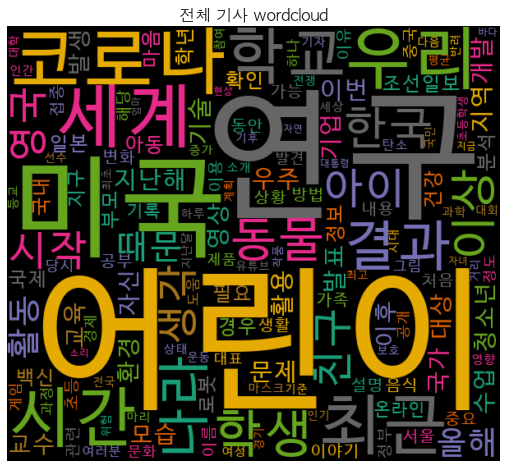

In [68]:
wordcloud(total_dtm['total_news'],'전체 기사 wordcloud')

#### N-gram
- n-gram은 n개의 연속적인 단어 나열을 의미
- 1-gram : unigram
- 2-gram : bigram
- 3-gram : trigram

In [69]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [70]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

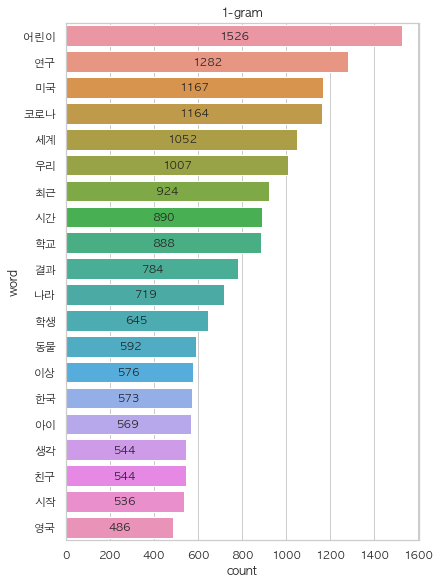

In [71]:
fig,ax=plt.subplots(1,1,figsize=(6,8),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
a,b=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':a,'count':b})
sns.barplot(data= word_count,x='count',y='word').set_title('1-gram')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=11)

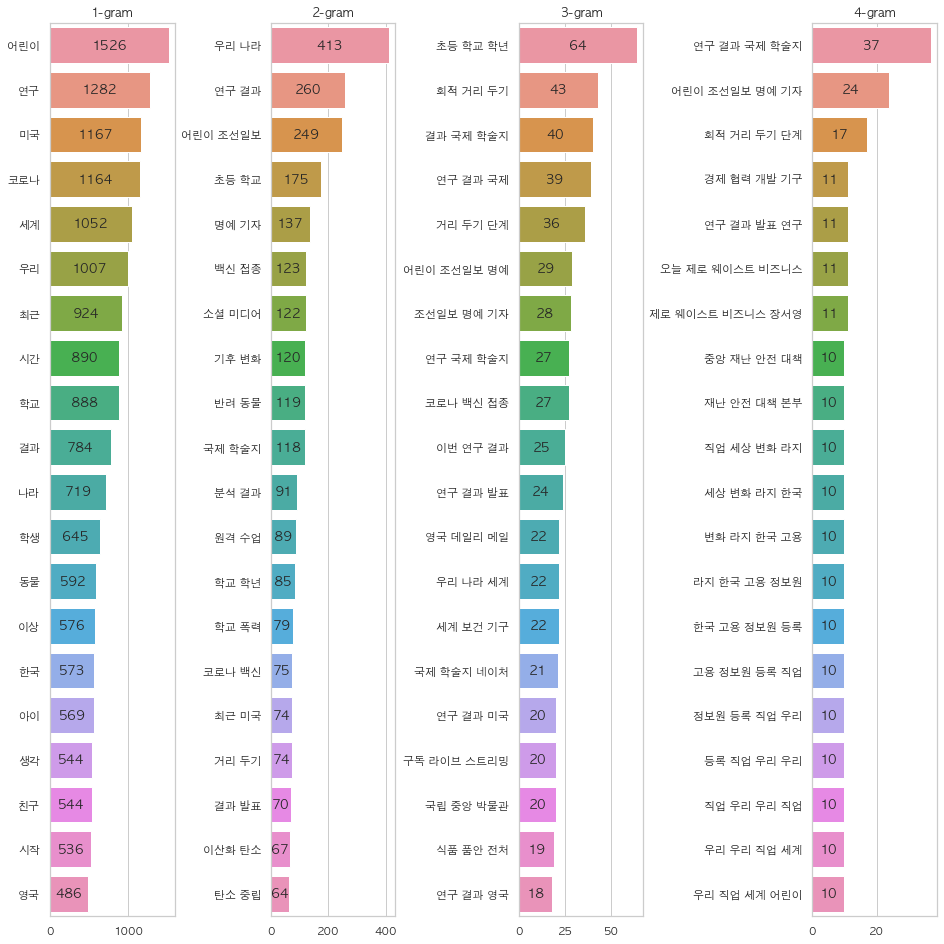

In [72]:
fig,ax=plt.subplots(1,4,figsize=(13,13),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
x,y=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[0]).set_title('1-gram')

top_2_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_2_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[1]).set_title('2-gram')

top_3_bigrams=get_top_ngram(doc,3)[:20]
x,y=map(list,zip(*top_3_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[2]).set_title('3-gram')

top_4_bigrams=get_top_ngram(doc,4)[:20]
x,y=map(list,zip(*top_4_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[3]).set_title('4-gram')

for i in range(len(ax)):
    for p in ax[i].patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax[i].annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=13)

### 8.2 기사 별 CountVectorizer 확인

In [73]:
cv = CountVectorizer(analyzer='word')

count_list = cv.fit_transform(news_df['news_article_mecab'])
list_of_word = cv.get_feature_names()
text_dtm = pd.DataFrame(count_list.toarray(), columns=list_of_word)
# text_dtm.index=news_df.news_title
text_dtm.index=news_df.news_title_mecab
text_dtm.head()

,가가,가가린,가감,가감산,가게,가격,가격대,가격표,가계,가계도,...,힌두스탄,힌즈,힌트,힐라,힐러리,힐리스,힐링,힐스,힘줄,힙합
news_title_mecab,,,,,,,,,,,,,,,,,,,,,
러시아 고양이,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
우크라 국경 탈출 세 소년,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
온라인 쇼핑몰 니켈 납 장신구 주의,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
코로나 혈액형 위험 최저,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화마 문화재 등 규모 피해,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
count_list.toarray().sum(axis=0)

array([3, 2, 2, ..., 2, 1, 5])

In [75]:
list_of_word[:10]

['가가', '가가린', '가감', '가감산', '가게', '가격', '가격대', '가격표', '가계', '가계도']

In [76]:
text_dtm=text_dtm.transpose()

In [77]:
text_dtm.head()

news_title_mecab,러시아 고양이,우크라 국경 탈출 세 소년,온라인 쇼핑몰 니켈 납 장신구 주의,코로나 혈액형 위험 최저,화마 문화재 등 규모 피해,세 소녀 우크라 친구 다리,기와집 초가집 너와집 옥,주꾸미 도다리 봄맛 활력 충전,빙하기 멸종 동물 아마존 암각화 미스터리,공부 것 목록,...,차 거 바람 태풍 마 이삭 상륙,햄버거 정크 푸드,비결 대로 쉼 번식,엄마 아빠 공부 권리,청각 장애 소통 투명 마스크,돼지 뇌 컴퓨터 칩 연결 생각 기계 수,탑승 로봇 프로스 테 시스 조종사,모험 준비 책장,방탄소년단 블랙 핑크 세계 음원 시장 올,알 파고 이세돌 단 건 딥 러닝 덕분
가가,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가가린,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가감,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가감산,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가게,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
for index,text in enumerate(text_dtm.columns[0:10]):
    news_rank_dict = text_dtm[text].sort_values(ascending=False)[:3].to_dict()
    print(text,news_rank_dict,sep='\n',end='\n----------\n')

러시아 고양이
{'고양이': 9, '러시아': 7, '대회': 4}
----------
우크라 국경 탈출 세 소년
{'소년': 4, '슬로바키아': 3, '우크라': 3}
----------
온라인 쇼핑몰 니켈 납 장신구 주의
{'제품': 4, '니켈': 4, '안전': 3}
----------
코로나 혈액형 위험 최저
{'연구': 6, '혈액형': 5, '코로나': 5}
----------
화마 문화재 등 규모 피해
{'산불': 5, '피해': 5, '지역': 3}
----------
세 소녀 우크라 친구 다리
{'로즈': 4, '아바': 4, '챌린지': 3}
----------
기와집 초가집 너와집 옥
{'지붕': 10, '기와집': 7, '볏짚': 5}
----------
주꾸미 도다리 봄맛 활력 충전
{'주꾸미': 7, '도다리': 3, '봄철': 2}
----------
빙하기 멸종 동물 아마존 암각화 미스터리
{'동물': 3, '암각화': 3, '엑서터': 2}
----------
공부 것 목록
{'아이': 4, '공부': 4, '엄마': 3}
----------


In [79]:
news_df.news_article[5]

'여덟 살짜리 소녀가 러시아의 침공으로 피해를 입은 우크라이나 어린이들을 위해 두 팔을 걷어붙이고 나섰다. 6일 영국 bbc에 따르면 링컨셔주에 는 아바 로즈 클라크는 우크라이나 친구를 돕기 위해 4시간 챌린지를 시작했다. 이 도전은 요크셔주와 링컨셔주를 잇는 전체 길이 20마일 규모의 험버 대교를 자전거로 건너는 것. 도전 첫날이었던 지난 5일 아바 로즈는 험버 대교의 6마일을 횡단하는 데 성공했다. 그는 우크라이나 어린이들이 평소 가지고 놀던 장난감과 물건을 버리고 피란하는 모습을 보며 도움을 줄 방법을 고민하던 중 챌린지를 생각해냈다고 말했다. 유니세프를 통해 1000파운드를 목표로 시작한 아바 로즈의 모금 챌린지 누적 금액은 7일 기준 1065파운드를 넘겼다. 험버 대교를 건너는 아바 로즈의 모습을 상상해서 그려주세요.'

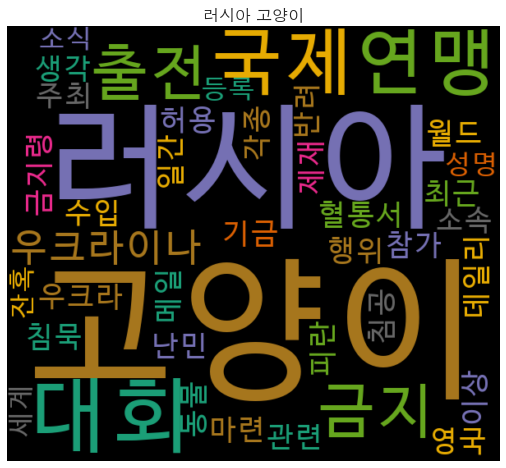

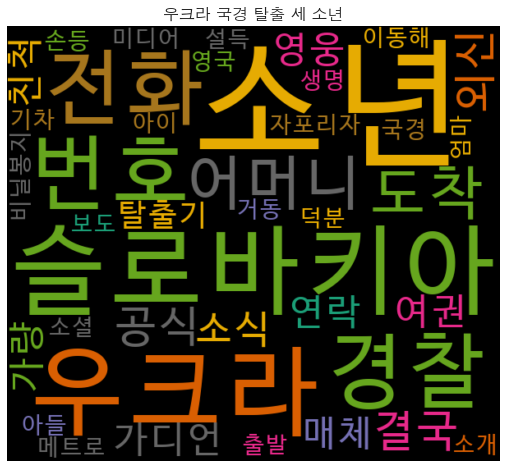

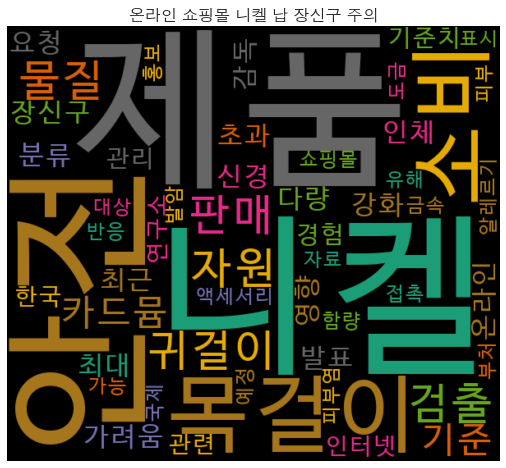

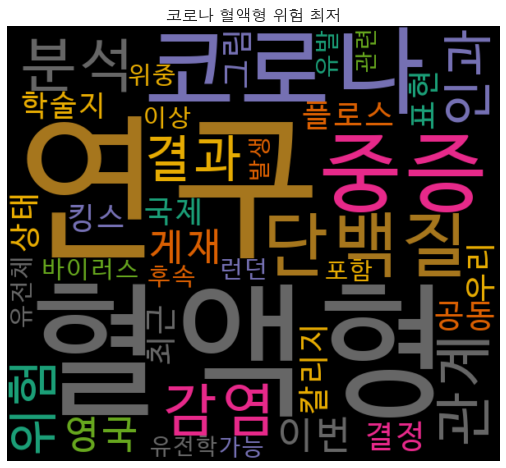

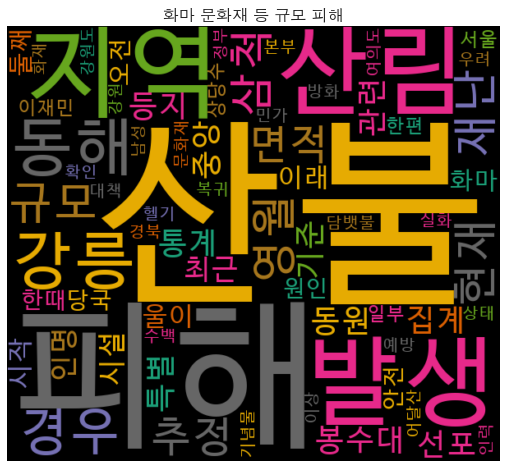

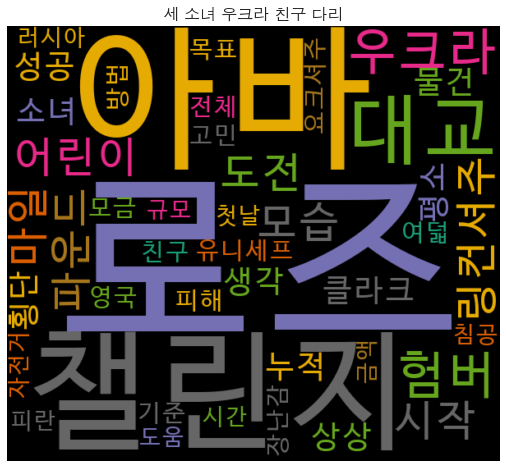

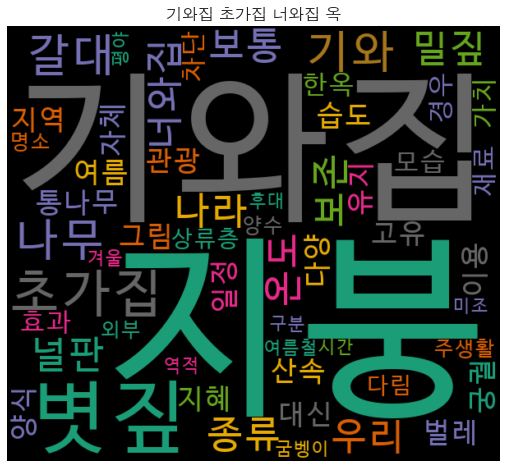

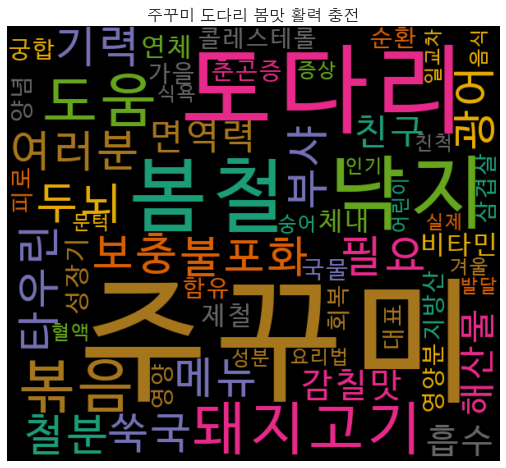

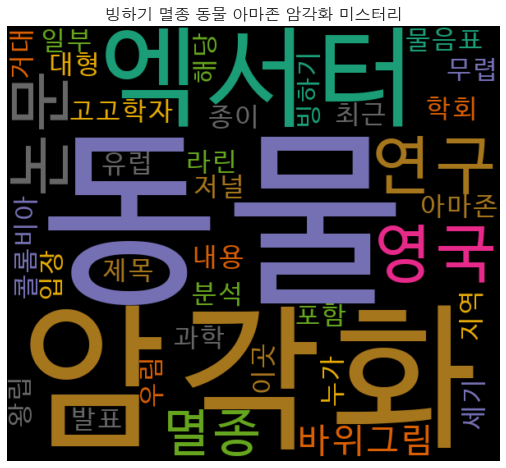

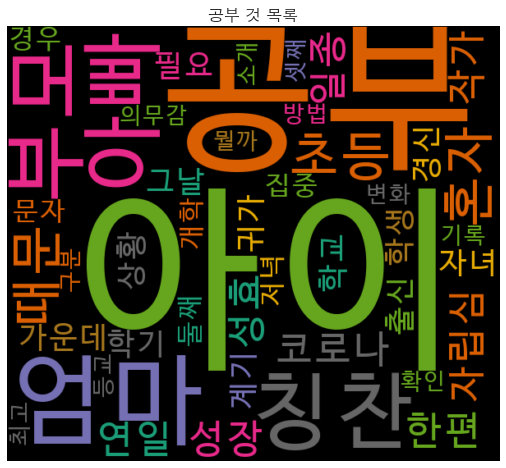

In [80]:
for index,text in enumerate(text_dtm.columns[0:10]):
    wordcloud(text_dtm[text].sort_values(ascending=False),text)